In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D, Flatten , Dropout , BatchNormalization
from keras import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Resume Projects/Lexis Nexis Project/history_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160137 entries, 0 to 160136
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   month                               160137 non-null  int64  
 1   day                                 160137 non-null  int64  
 2   sched_dep_time                      160137 non-null  int64  
 3   sched_arr_time                      160137 non-null  int64  
 4   day_of_week                         160137 non-null  int64  
 5   lateflight                          160137 non-null  int64  
 6   duration                            160137 non-null  int64  
 7   Carrier_Arrival_Delayed_Percentage  160137 non-null  float64
 8   Carrier_Deaprted_late_perc          160137 non-null  float64
 9   Origin_Percentage_Delayed           160137 non-null  float64
 10  Hour_Arr_delay_Perc                 160137 non-null  float64
 11  Hour_Dep_delay_Perc       

In [4]:
df['lateflight'].value_counts()

0    113130
1     47007
Name: lateflight, dtype: int64

In [5]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [6]:

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [7]:
# Target variable
target_variable  = 'lateflight'

In [8]:
# Separate the features and target variable
X = df.drop(target_variable,axis=1)
y = df[target_variable]

In [9]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Apply smote
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

In [11]:
# Scale the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [12]:


# Create a new balanced DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled_scaled, columns=X.columns), pd.Series(y_resampled, name=target_variable)], axis=1)



In [13]:
balanced_df['lateflight'].value_counts()

1    90476
0    90476
Name: lateflight, dtype: int64

In [14]:
records = balanced_df.shape[0]
records

180952

In [15]:
# Total Arrival Delays and On time Arrival %
print('Percentage of Arrival Delays is',round(balanced_df['lateflight'].value_counts()[1]/records*100,2),'%')
print('Percentage of On Time Arrivals is',round(balanced_df['lateflight'].value_counts()[0]/records*100,2),'%')

Percentage of Arrival Delays is 50.0 %
Percentage of On Time Arrivals is 50.0 %


<Axes: xlabel='lateflight', ylabel='count'>

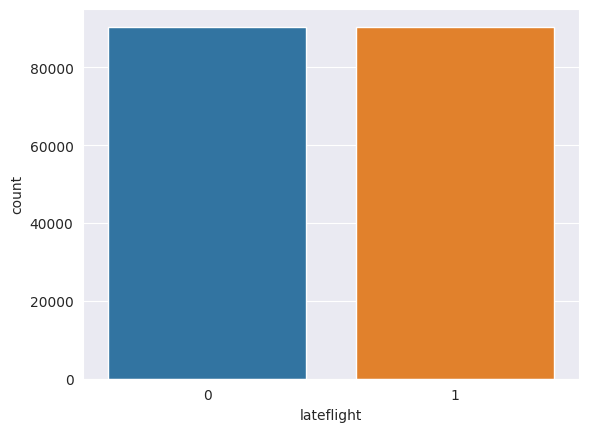

In [16]:
sns.countplot(x='lateflight',data=balanced_df)

In [ ]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('LOSS', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.show()

    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('ACCURACY', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.show()

In [ ]:
def conf_matrix(conf_mat,):

    conf_mat = pd.DataFrame(conf_mat, index = ['0', '1'], columns = ['0', '1'])
    sns.set(font_scale=1.4)
    plt.figure(figsize = (5,5))
    sns.heatmap(conf_mat, cmap= "Blues", linecolor = 'black' , linewidth = 1, annot = True, fmt='')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.show()

In [ ]:
def model_metrics(a, b):

    accuracy = metrics.accuracy_score(a, b)
    precision = precision_score(a, b)
    recall = recall_score(a, b)
    f1 = f1_score(a, b)

    print('Accuracy:', round(accuracy*100, 2),'%')
    print('Precision score:', round(precision*100, 2),'%')
    print('Recall score:', round(recall*100, 2),'%')
    print('F1 score:', round(f1*100, 2),'%')

In [ ]:
priority_features = ['day', 'sched_dep_time', 'sched_arr_time', 'duration',
       'tail_delay_percent', 'tail_arr_delay', 'Carr_Dest_Arrival_delay',
       'Carr_Day_Arrival_delay', 'flight_encoded', 'tailnum_encoded']

In [ ]:
X = balanced_df[priority_features]
y = balanced_df['lateflight']

In [ ]:
balanced_df.isna().sum().sum()

0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model 1

In [ ]:
model_1 = Sequential()

model_1.add(Dense(30, activation='tanh', input_shape=(10,)))

model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results1 = model_1.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
4072/4072 [==============================] - 11s 2ms/step - loss: 0.6539 - accuracy: 0.6079 - val_loss: 0.6526 - val_accuracy: 0.6078
Epoch 2/5
4072/4072 [==============================] - 10s 2ms/step - loss: 0.6493 - accuracy: 0.6135 - val_loss: 0.6484 - val_accuracy: 0.6144
Epoch 3/5
4072/4072 [==============================] - 8s 2ms/step - loss: 0.6454 - accuracy: 0.6191 - val_loss: 0.6459 - val_accuracy: 0.6184
Epoch 4/5
4072/4072 [==============================] - 11s 3ms/step - loss: 0.6432 - accuracy: 0.6221 - val_loss: 0.6445 - val_accuracy: 0.6223
Epoch 5/5
4072/4072 [==============================] - 7s 2ms/step - loss: 0.6417 - accuracy: 0.6235 - val_loss: 0.6440 - val_accuracy: 0.6220


In [ ]:
y_pred_m1 = model_1.predict(X_test)
y_pred_m1 =(y_pred_m1 > 0.5)

1131/1131 [==============================] - 2s 1ms/step


In [ ]:
cm_m1 = confusion_matrix(y_test, y_pred_m1)
print(cm_m1)
print("------------------")
print(classification_report(y_test, y_pred_m1))

[[10505  7491]
 [ 5964 12231]]
------------------
              precision    recall  f1-score   support

           0       0.64      0.58      0.61     17996
           1       0.62      0.67      0.65     18195

    accuracy                           0.63     36191
   macro avg       0.63      0.63      0.63     36191
weighted avg       0.63      0.63      0.63     36191



In [ ]:
model_metrics(y_test, y_pred_m1)

Accuracy: 62.82 %
Precision score: 62.02 %
Recall score: 67.22 %
F1 score: 64.51 %


# Model2

In [ ]:
model_2 = Sequential()

model_2.add(Dense(30, activation='tanh', input_shape=(10,)))

model_2.add(Dense(10, activation='tanh'))

model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results2 = model_2.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
4072/4072 [==============================] - 11s 2ms/step - loss: 0.6536 - accuracy: 0.6096 - val_loss: 0.6509 - val_accuracy: 0.6099
Epoch 2/5
4072/4072 [==============================] - 8s 2ms/step - loss: 0.6469 - accuracy: 0.6185 - val_loss: 0.6461 - val_accuracy: 0.6148
Epoch 3/5
4072/4072 [==============================] - 10s 2ms/step - loss: 0.6426 - accuracy: 0.6220 - val_loss: 0.6442 - val_accuracy: 0.6177
Epoch 4/5
4072/4072 [==============================] - 9s 2ms/step - loss: 0.6410 - accuracy: 0.6250 - val_loss: 0.6417 - val_accuracy: 0.6234
Epoch 5/5
4072/4072 [==============================] - 9s 2ms/step - loss: 0.6397 - accuracy: 0.6259 - val_loss: 0.6432 - val_accuracy: 0.6235


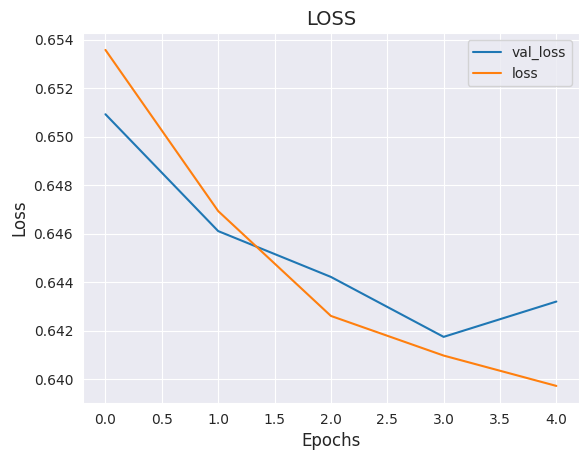

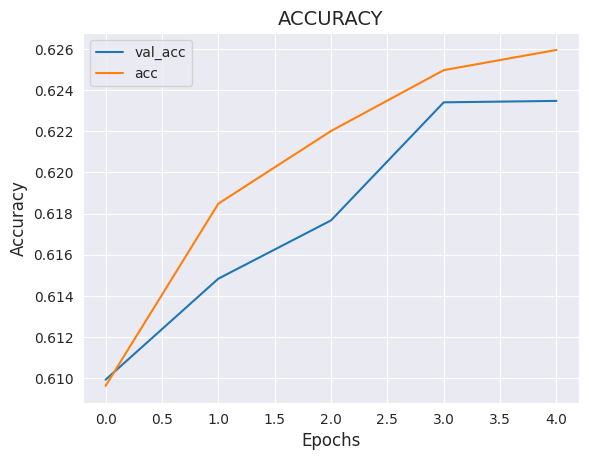

In [ ]:
visualize_training_results(results2)

In [ ]:
y_pred_m2 = model_2.predict(X_test)
y_pred_m2 =(y_pred_m1 > 0.5)

1131/1131 [==============================] - 1s 1ms/step


In [ ]:
cm_m2 = confusion_matrix(y_test, y_pred_m2)
print(cm_m2)
print("------------------")
print(classification_report(y_test, y_pred_m2))

[[10505  7491]
 [ 5964 12231]]
------------------
              precision    recall  f1-score   support

           0       0.64      0.58      0.61     17996
           1       0.62      0.67      0.65     18195

    accuracy                           0.63     36191
   macro avg       0.63      0.63      0.63     36191
weighted avg       0.63      0.63      0.63     36191



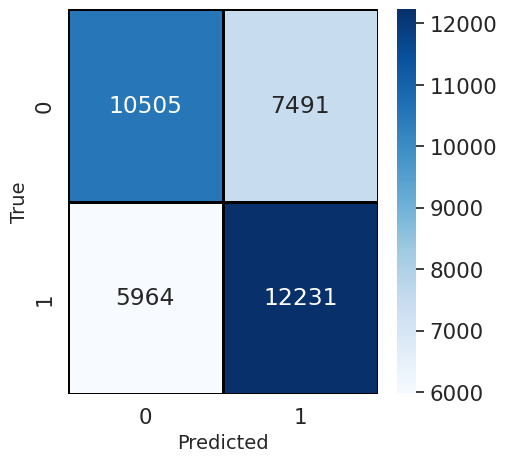

In [ ]:
conf_matrix(cm_m2)

In [ ]:
model_metrics(y_test, y_pred_m2)

Accuracy: 62.82 %
Precision score: 62.02 %
Recall score: 67.22 %
F1 score: 64.51 %


## Model 3





In [ ]:
model_3 = Sequential()

model_3.add(Dense(30, activation='relu', input_shape=(10,)))

model_3.add(Dense(10, activation='relu'))

model_3.add(Dense(5, activation='relu'))

model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results3 = model_3.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
4072/4072 [==============================] - 11s 2ms/step - loss: 0.6494 - accuracy: 0.6122 - val_loss: 0.6450 - val_accuracy: 0.6190
Epoch 2/5
4072/4072 [==============================] - 8s 2ms/step - loss: 0.6407 - accuracy: 0.6237 - val_loss: 0.6425 - val_accuracy: 0.6197
Epoch 3/5
4072/4072 [==============================] - 10s 3ms/step - loss: 0.6385 - accuracy: 0.6267 - val_loss: 0.6410 - val_accuracy: 0.6231
Epoch 4/5
4072/4072 [==============================] - 9s 2ms/step - loss: 0.6370 - accuracy: 0.6294 - val_loss: 0.6412 - val_accuracy: 0.6250
Epoch 5/5
4072/4072 [==============================] - 10s 2ms/step - loss: 0.6363 - accuracy: 0.6294 - val_loss: 0.6382 - val_accuracy: 0.6268


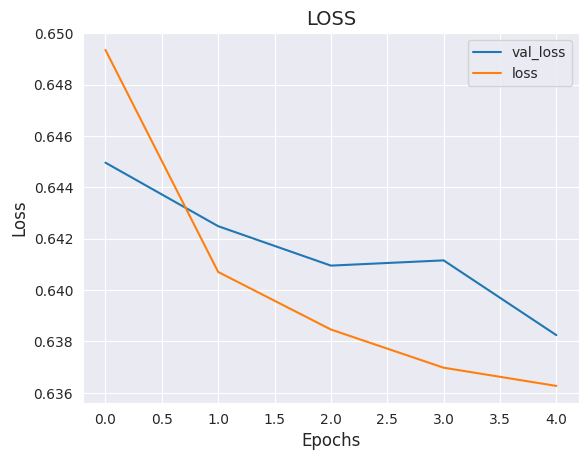

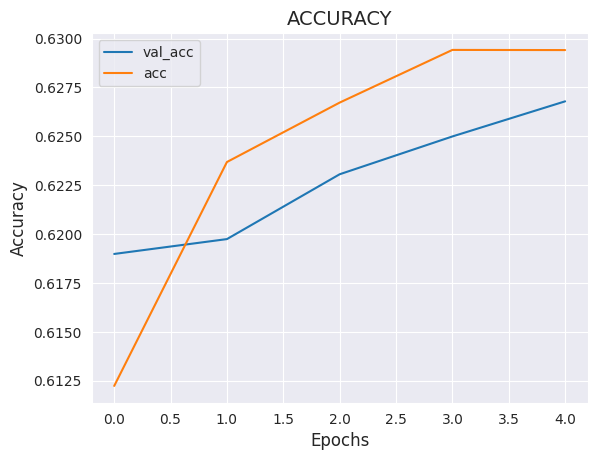

In [ ]:
visualize_training_results(results3)

In [ ]:
y_pred_m3 = model_3.predict(X_test)
y_pred_m3 =(y_pred_m3 > 0.5)

1131/1131 [==============================] - 2s 2ms/step


In [ ]:
cm_m3 = confusion_matrix(y_test, y_pred_m3)
print(cm_m3)
print("------------------")
print(classification_report(y_test, y_pred_m3))

[[10422  7574]
 [ 5777 12418]]
------------------
              precision    recall  f1-score   support

           0       0.64      0.58      0.61     17996
           1       0.62      0.68      0.65     18195

    accuracy                           0.63     36191
   macro avg       0.63      0.63      0.63     36191
weighted avg       0.63      0.63      0.63     36191



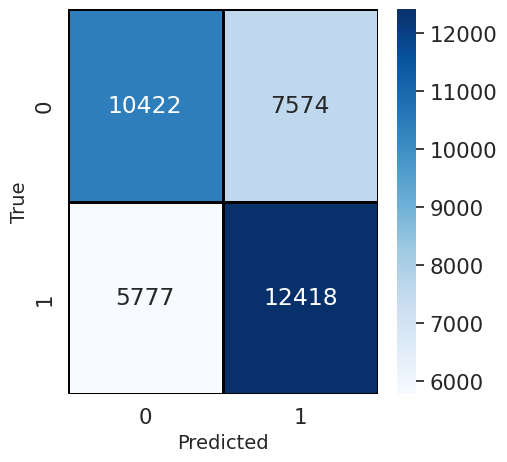

In [ ]:
conf_matrix(cm_m3)

In [ ]:
model_metrics(y_test, y_pred_m3)

Accuracy: 63.11 %
Precision score: 62.11 %
Recall score: 68.25 %
F1 score: 65.04 %


## Model 4

In [ ]:
model_4 = Sequential()

model_4.add(Dense(30, activation='relu', input_shape=(10,)))

model_4.add(Dense(10, activation='relu'))

model_4.add(Dense(5, activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results4 = model_4.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
4072/4072 [==============================] - 11s 2ms/step - loss: 0.6469 - accuracy: 0.6156 - val_loss: 0.6433 - val_accuracy: 0.6200
Epoch 2/10
4072/4072 [==============================] - 10s 3ms/step - loss: 0.6402 - accuracy: 0.6253 - val_loss: 0.6417 - val_accuracy: 0.6217
Epoch 3/10
4072/4072 [==============================] - 8s 2ms/step - loss: 0.6387 - accuracy: 0.6269 - val_loss: 0.6390 - val_accuracy: 0.6258
Epoch 4/10
4072/4072 [==============================] - 10s 3ms/step - loss: 0.6374 - accuracy: 0.6280 - val_loss: 0.6411 - val_accuracy: 0.6260
Epoch 5/10
4072/4072 [==============================] - 10s 2ms/step - loss: 0.6365 - accuracy: 0.6291 - val_loss: 0.6383 - val_accuracy: 0.6283
Epoch 6/10
4072/4072 [==============================] - 9s 2ms/step - loss: 0.6361 - accuracy: 0.6307 - val_loss: 0.6381 - val_accuracy: 0.6285
Epoch 7/10
4072/4072 [==============================] - 10s 3ms/step - loss: 0.6356 - accuracy: 0.6312 - val_loss: 0.6370 - val_accu

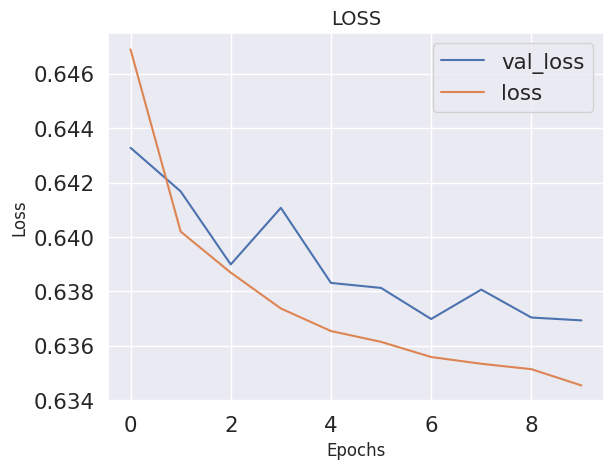

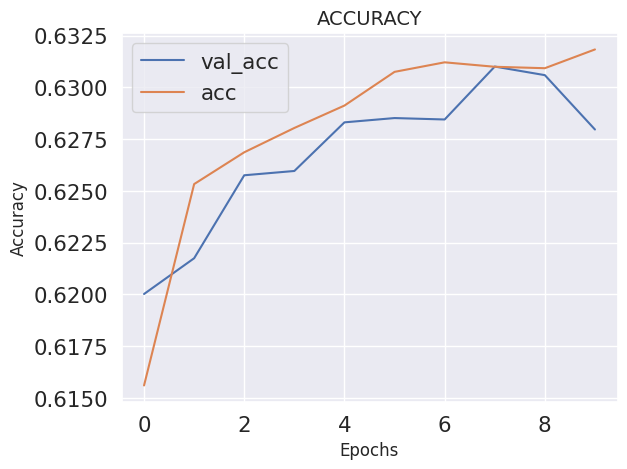

In [ ]:
visualize_training_results(results4)

In [ ]:
y_pred_m4 = model_4.predict(X_test)
y_pred_m4 =(y_pred_m4 > 0.5)

1131/1131 [==============================] - 2s 1ms/step


In [ ]:
cm_m4 = confusion_matrix(y_test, y_pred_m4)
print(cm_m4)
print("------------------")
print(classification_report(y_test, y_pred_m4))

[[10916  7080]
 [ 6259 11936]]
------------------
              precision    recall  f1-score   support

           0       0.64      0.61      0.62     17996
           1       0.63      0.66      0.64     18195

    accuracy                           0.63     36191
   macro avg       0.63      0.63      0.63     36191
weighted avg       0.63      0.63      0.63     36191



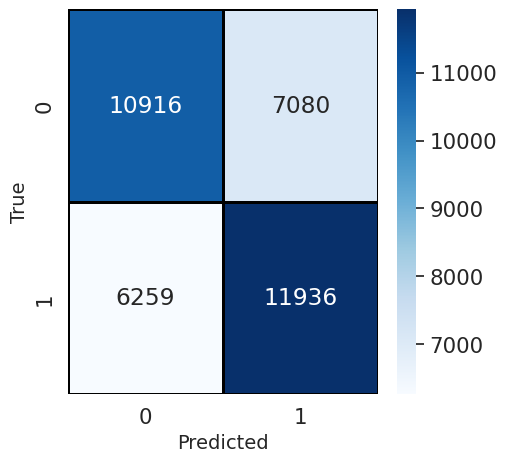

In [ ]:
conf_matrix(cm_m4)

In [ ]:
model_metrics(y_test, y_pred_m4)

Accuracy: 63.14 %
Precision score: 62.77 %
Recall score: 65.6 %
F1 score: 64.15 %


## Model 5

In [ ]:
model_5 = Sequential()

model_5.add(Dense(30, activation='relu', input_shape=(10,)))

model_5.add(Dense(20, activation='relu'))

model_5.add(Dense(5, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results5 = model_5.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Epoch 1/2
4072/4072 [==============================] - 12s 2ms/step - loss: 0.6498 - accuracy: 0.6121 - val_loss: 0.6436 - val_accuracy: 0.6181
Epoch 2/2
4072/4072 [==============================] - 10s 3ms/step - loss: 0.6404 - accuracy: 0.6237 - val_loss: 0.6413 - val_accuracy: 0.6178


In [ ]:
y_pred_m5 = model_5.predict(X_test)
y_pred_m5 =(y_pred_m1 > 0.5)

1131/1131 [==============================] - 2s 1ms/step


In [ ]:
cm_m5 = confusion_matrix(y_test, y_pred_m5)
print(cm_m5)
print("------------------")
print(classification_report(y_test, y_pred_m5))

[[10505  7491]
 [ 5964 12231]]
------------------
              precision    recall  f1-score   support

           0       0.64      0.58      0.61     17996
           1       0.62      0.67      0.65     18195

    accuracy                           0.63     36191
   macro avg       0.63      0.63      0.63     36191
weighted avg       0.63      0.63      0.63     36191



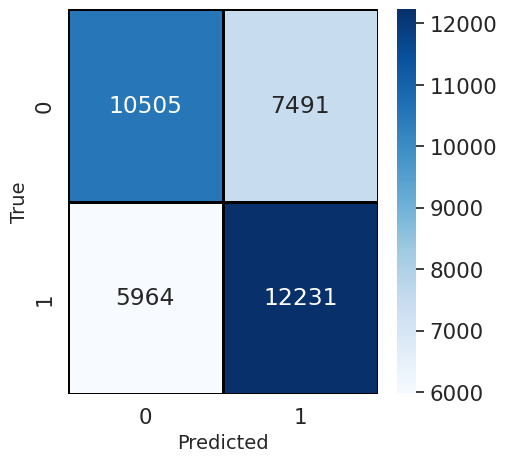

In [ ]:
conf_matrix(cm_m5)

In [ ]:
model_metrics(y_test, y_pred_m5)

Accuracy: 62.82 %
Precision score: 62.02 %
Recall score: 67.22 %
F1 score: 64.51 %


## Model 6

In [ ]:
model_6 = Sequential()

model_6.add(Dense(50, activation='relu', input_shape=(10,)))

model_6.add(Dense(40, activation='relu'))

model_6.add(Dense(30, activation='relu'))

model_6.add(Dense(5, activation='relu'))

model_6.add(Dense(1, activation='sigmoid'))

In [ ]:
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results6 = model_6.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Epoch 1/2
4072/4072 [==============================] - 11s 2ms/step - loss: 0.6448 - accuracy: 0.6188 - val_loss: 0.6410 - val_accuracy: 0.6243
Epoch 2/2
4072/4072 [==============================] - 10s 2ms/step - loss: 0.6387 - accuracy: 0.6267 - val_loss: 0.6398 - val_accuracy: 0.6250


In [ ]:
y_pred_m6 = model_6.predict(X_test)
y_pred_m6 =(y_pred_m6 > 0.5)

1131/1131 [==============================] - 2s 1ms/step


In [ ]:
cm_m6 = confusion_matrix(y_test, y_pred_m6)
print(cm_m6)
print("------------------")
print(classification_report(y_test, y_pred_m6))

[[ 9741  8255]
 [ 5230 12965]]
------------------
              precision    recall  f1-score   support

           0       0.65      0.54      0.59     17996
           1       0.61      0.71      0.66     18195

    accuracy                           0.63     36191
   macro avg       0.63      0.63      0.62     36191
weighted avg       0.63      0.63      0.62     36191



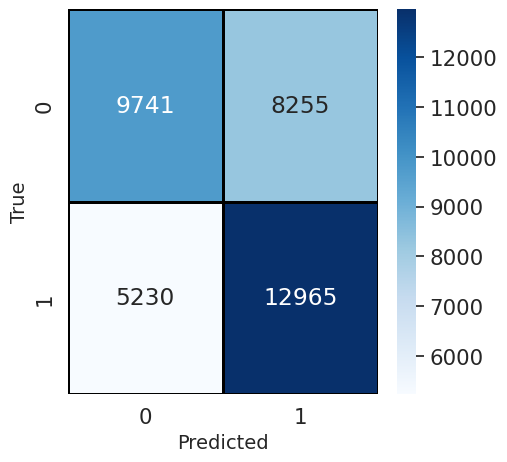

In [ ]:
conf_matrix(cm_m6)

In [ ]:
model_metrics(y_test, y_pred_m6)

Accuracy: 62.74 %
Precision score: 61.1 %
Recall score: 71.26 %
F1 score: 65.79 %


## Model 7

In [ ]:
model_7 = Sequential()

model_7.add(Dense(30, activation='relu', input_shape=(10,)))

model_7.add(Dense(100, activation='relu'))

model_7.add(Dense(200, activation='relu'))

model_7.add(Dense(1, activation='sigmoid'))

In [ ]:
model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
results7 = model_7.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
4072/4072 [==============================] - 12s 3ms/step - loss: 0.6450 - accuracy: 0.6193 - val_loss: 0.6478 - val_accuracy: 0.6197
Epoch 2/25
4072/4072 [==============================] - 11s 3ms/step - loss: 0.6387 - accuracy: 0.6276 - val_loss: 0.6395 - val_accuracy: 0.6253
Epoch 3/25
4072/4072 [==============================] - 12s 3ms/step - loss: 0.6371 - accuracy: 0.6282 - val_loss: 0.6392 - val_accuracy: 0.6291
Epoch 4/25
4072/4072 [==============================] - 11s 3ms/step - loss: 0.6358 - accuracy: 0.6298 - val_loss: 0.6389 - val_accuracy: 0.6285
Epoch 5/25
4072/4072 [==============================] - 10s 2ms/step - loss: 0.6346 - accuracy: 0.6316 - val_loss: 0.6366 - val_accuracy: 0.6301
Epoch 6/25
4072/4072 [==============================] - 11s 3ms/step - loss: 0.6337 - accuracy: 0.6322 - val_loss: 0.6365 - val_accuracy: 0.6324
Epoch 7/25
4072/4072 [==============================] - 11s 3ms/step - loss: 0.6322 - accuracy: 0.6335 - val_loss: 0.6385 - val_ac

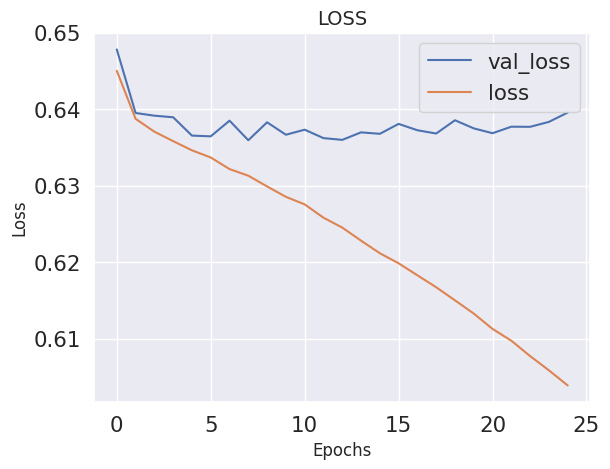

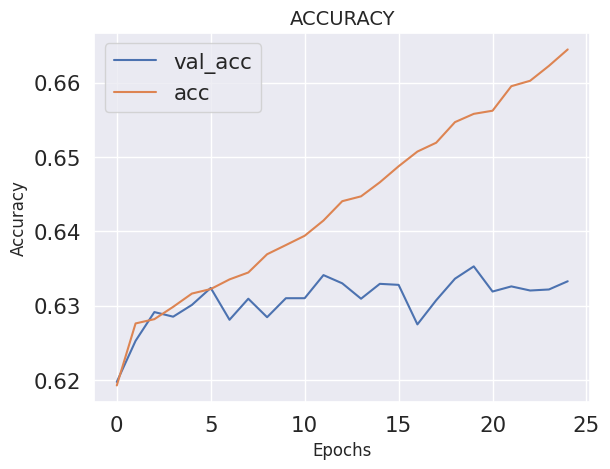

In [ ]:
visualize_training_results(results7)

In [ ]:
y_pred_m7 = model_7.predict(X_test)
y_pred_m7 =(y_pred_m7 > 0.5)

1131/1131 [==============================] - 2s 1ms/step


In [ ]:
cm_m7 = confusion_matrix(y_test, y_pred_m7)
print(cm_m7)
print("------------------")
print(classification_report(y_test, y_pred_m7))

[[11401  6595]
 [ 6580 11615]]
------------------
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     17996
           1       0.64      0.64      0.64     18195

    accuracy                           0.64     36191
   macro avg       0.64      0.64      0.64     36191
weighted avg       0.64      0.64      0.64     36191



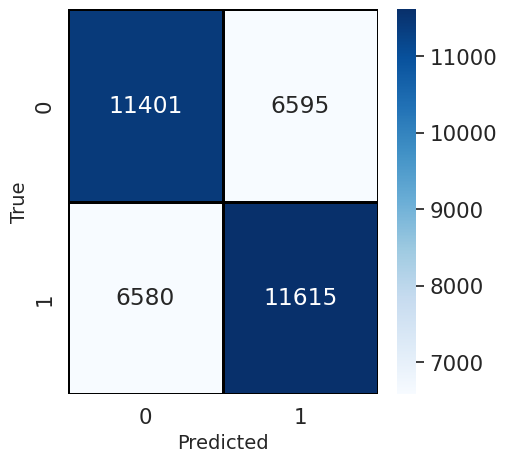

In [ ]:
conf_matrix(cm_m7)

In [ ]:
model_metrics(y_test, y_pred_m7)

Accuracy: 63.6 %
Precision score: 63.78 %
Recall score: 63.84 %
F1 score: 63.81 %
